In [1]:
import pandas as pd

df = pd.read_csv("../../../../data/preprocessed_data.csv")

Separate between objective and independent variables

In [2]:
x = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

Divide the data between train and test data

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

Implementing Random Forest, KNN and Logistic Regresion

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import mutual_info_classif, SelectKBest


# Use mutual information with k=2 for feature selection
k_best = SelectKBest(mutual_info_classif, k=2)
x_train_selected = k_best.fit_transform(x_train, y_train)
x_test_selected = k_best.transform(x_test)

# Get the selected feature indices
selected_indices = k_best.get_support(indices=True)

# Print the selected feature names
selected_features = x_train.columns[selected_indices]
print(f"Selected Features: {selected_features.tolist()}")

# Initialize the Random Forest model
modelRandomForest = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize the KNN model
modelKNN = KNeighborsClassifier(n_neighbors=12)

# Initialize the Logistic Regression model
modelLogistic = LogisticRegression(max_iter=500, random_state=42)

# Fit the models on the training data
modelRandomForest.fit(x_train_selected, y_train)
modelKNN.fit(x_train_selected, y_train)
modelLogistic.fit(x_train_selected, y_train)

# Make predictions on the test data for each model
y_pred_random_forest = modelRandomForest.predict(x_test_selected)
y_pred_knn = modelKNN.predict(x_test_selected)
y_pred_logistic = modelLogistic.predict(x_test_selected)

# Calculate evaluation metrics for each model
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
f1_random_forest = f1_score(y_test, y_pred_random_forest)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

# Print the metrics for each model
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy_random_forest)
print("Recall:", recall_random_forest)
print("F1 Score:", f1_random_forest)

print("\nKNN Classifier Metrics:")
print("Accuracy:", accuracy_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)


Selected Features: ['AgeCategory', 'GenHealth']
Random Forest Classifier Metrics:
Accuracy: 0.7459877154745393
Recall: 0.7923987776928954
F1 Score: 0.7639477076044927

KNN Classifier Metrics:
Accuracy: 0.7273627897761046
Recall: 0.692131398013751
F1 Score: 0.7248000000000001

Logistic Regression Metrics:
Accuracy: 0.7459877154745393
Recall: 0.7912528647822765
F1 Score: 0.7636866359447004


Bagging

c:\Users\pablo\OneDrive\Documentos\GitHub\Probabilistic-Heart-Disease-Prediction\venv\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Bagging Classifier Metrics:
Accuracy: 0.7459877154745393
Recall: 0.7912528647822765
F1 Score: 0.7636866359447004


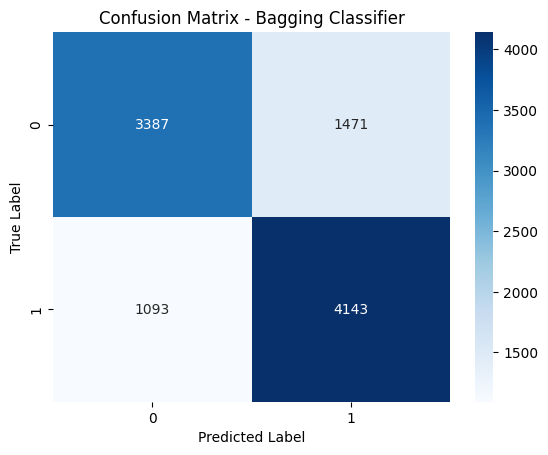

In [7]:
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the BaggingClassifier with Logistic Regression as the base estimator
bagging_model = BaggingClassifier(base_estimator=LogisticRegression(max_iter=500, random_state=42),
                                  n_estimators=10, random_state=42)

bagging_model.fit(x_train_selected, y_train)

y_pred_bagging = bagging_model.predict(x_test_selected)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
recall_bagging = recall_score(y_test, y_pred_bagging)
f1_bagging = f1_score(y_test, y_pred_bagging)
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)

print("\nBagging Classifier Metrics:")
print("Accuracy:", accuracy_bagging)
print("Recall:", recall_bagging)
print("F1 Score:", f1_bagging)

# Plot the confusion matrix for Bagging
sns.heatmap(conf_matrix_bagging, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Bagging Classifier")
plt.show()